# EDA

In [249]:
import datetime
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import matplotlib.ticker as ticker
from category_encoders import TargetEncoder


In [163]:
# Loading data from ga_sessions.csv file
df_ses = pd.read_csv('data/ga_sessions.csv', dtype={'session_id':'str', 'client_id': 'str', 'visit_date':'str', 'visit_time': 'str',
    'visit_number':'int', 'utm_source': 'str', 'utm_medium':'str', 'utm_campaign': 'str', 'utm_medium':'str','utm_campaign':'str',
    'utm_adcontent': 'str', 'utm_keyword':'str', 'device_category': 'str', 'device_os':'str', 'device_brand':'str', 
    'device_model': 'str', 'device_screen_resolution':'str', 'device_browser': 'str', 'geo_country':'str','geo_city':'str'})


In [250]:
df_ses.head()


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [164]:
# Loading data from ga_hits.csv file
df_hits = pd.read_csv('data/ga_hits.csv', usecols=['session_id', 'event_action'], dtype={'session_id':'str', 'event_action': 'str'})
df_hits.head()

,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show
1,7750352294969115059.1640271109.1640271109,quiz_show
2,885342191847998240.1640235807.1640235807,quiz_show
3,142526202120934167.1640211014.1640211014,quiz_show
4,3450086108837475701.1640265078.1640265078,quiz_show


## Data Cleaning

In [165]:
# Preparing a dataset with a target variable - converting the target variable into a binary form
success_action = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click',
           'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

In [166]:
index = list(df_hits[df_hits['event_action'].isin(success_action)].index)
df_hits.loc[index, 'event_action_ind'] = 1
df_hits['event_action_ind'] = df_hits['event_action_ind'].fillna(0)
df_hits.head()

,session_id,event_action,event_action_ind
0,5639623078712724064.1640254056.1640254056,quiz_show,0.0
1,7750352294969115059.1640271109.1640271109,quiz_show,0.0
2,885342191847998240.1640235807.1640235807,quiz_show,0.0
3,142526202120934167.1640211014.1640211014,quiz_show,0.0
4,3450086108837475701.1640265078.1640265078,quiz_show,0.0


In [167]:
hits = df_hits.groupby(['session_id'], as_index=False)[['event_action_ind']].max()

In [168]:
# Creating a single dataframe by using an inner merge
df = pd.merge(left=df_ses, right=hits, on='session_id', how='inner') 
df.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action_ind
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0


In [169]:
df.shape

(1732266, 19)

In [170]:
# Casting the target variable type
df['event_action_ind'] = df['event_action_ind'].astype(int)
df['event_action_ind'].dtype

dtype('int64')

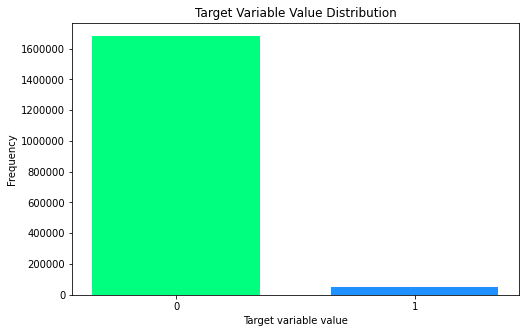

In [171]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df['event_action_ind'].unique(), df['event_action_ind'].value_counts(), width=0.7, color=['springgreen', 'dodgerblue'])
ax.set_xlabel('Target variable value')
ax.set_ylabel('Frequency')
ax.set_title('Target Variable Value Distribution')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [172]:
# Number of Target variable values
df['event_action_ind'].value_counts()

0    1681952
1      50314
Name: event_action_ind, dtype: int64

Target action occurs in about 3% of sessions

### Check for duplicates

In [173]:
print('Number of duplicates - ', len(df[df.duplicated()].values)) 

Number of duplicates -  0


### Check for gaps

In [174]:
df.nunique()

session_id                  1732266
client_id                   1320704
visit_date                      226
visit_time                    85032
visit_number                    533
utm_source                      280
utm_medium                       55
utm_campaign                    406
utm_adcontent                   280
utm_keyword                    1192
device_category                   3
device_os                        13
device_brand                    200
device_model                    104
device_screen_resolution       4947
device_browser                   55
geo_country                     159
geo_city                       2389
event_action_ind                  2
dtype: int64

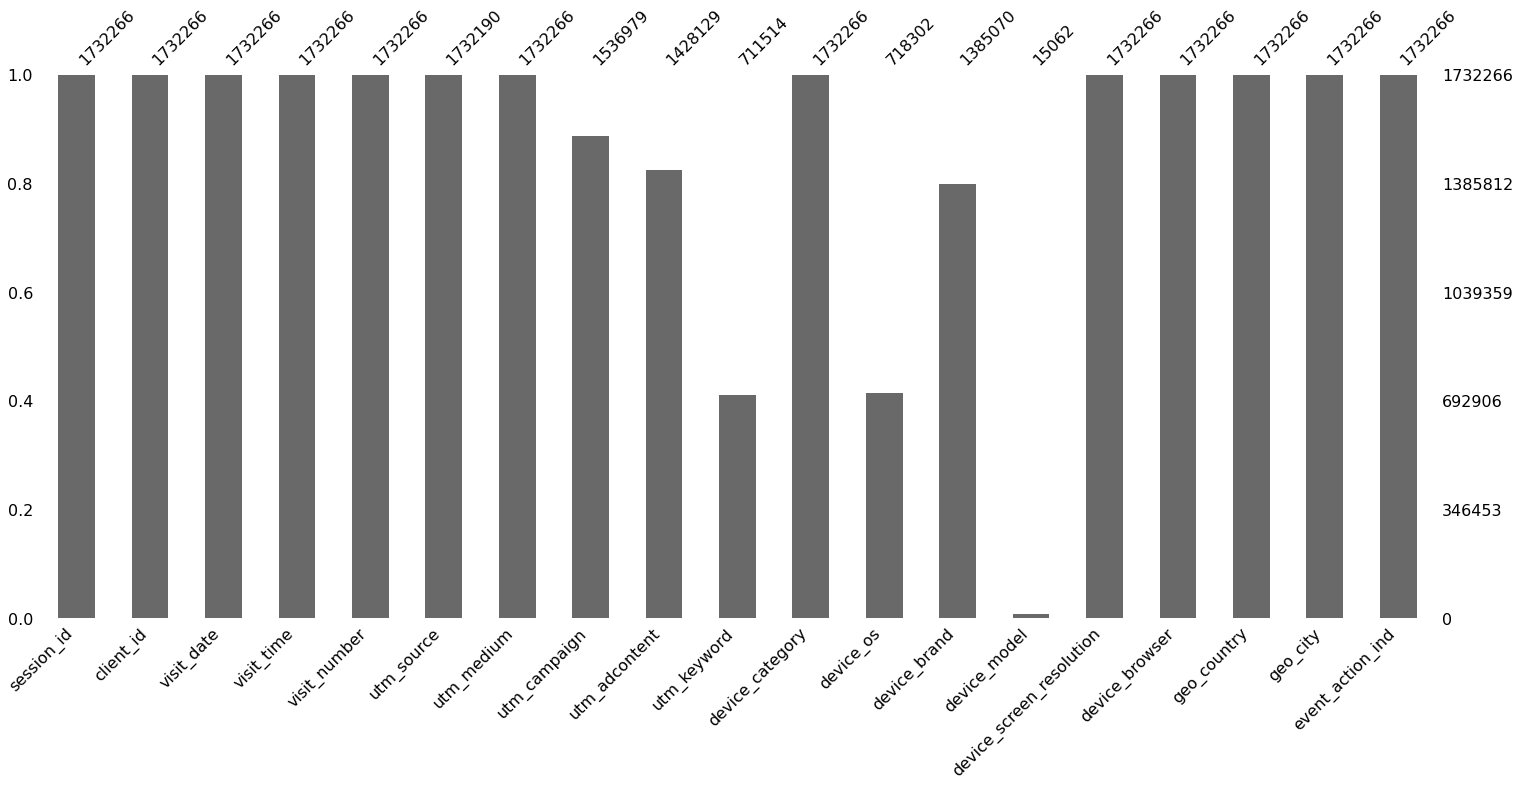

In [175]:
msno.bar(df);

In [176]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('% of missing values:')
missing_values

% of missing values:


device_model                99.130503
utm_keyword                 58.925823
device_os                   58.533966
device_brand                20.042880
utm_adcontent               17.557177
utm_campaign                11.273500
utm_source                   0.004387
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
event_action_ind             0.000000
dtype: float64

In [177]:
def print_useful_rows_info(df):
    print('The number of completely filled objects from the entire sample:', 
          len(df.dropna()))
    print('Percentage of completely filled objects from the entire sample:', 
          round(len(df.dropna()) / len(df) * 100, 2))


print_useful_rows_info(df)

The number of completely filled objects from the entire sample: 13829
Percentage of completely filled objects from the entire sample: 0.8


### Gaps processing in 'device_model'

In [178]:
# Removing the 'device_model' column because of 99% of data is missing
df = df.drop(columns=['device_model'], axis=1)

### Gaps processing in 'device_brand'

In [179]:
df['device_brand'].value_counts(dropna=False)

Apple       503533
NaN         347196
Samsung     311641
Xiaomi      269251
Huawei      173828
             ...  
Tesla            1
Vodafone         1
Wexler           1
Smarteo          1
Maxvi            1
Name: device_brand, Length: 201, dtype: int64

In [180]:
df.loc[df['device_os'] == 'Macintosh', 'device_brand'] = 'Apple'

In [181]:
df['device_brand'] = df['device_brand'].fillna('unidentified')

In [182]:
print('Number of missing values ​​in device_brand:', df.device_brand.isna().sum()) 

Number of missing values ​​in device_brand: 0


In [183]:
# Replacing Missing Data
for column in df.columns:
    df.loc[:, column] = df.loc[:, column].apply(lambda x: 'unidentified' if x == '(not set)' else x)

### Filling in missing data in 'device_os'

In [184]:
# Filling the gaps in 'device_os' feature with mode function or 'unidenfied' value
def restore_os(df):
    group = df.groupby([df.columns[0], df.columns[1]], as_index=False)[df.columns[2]].agg(pd.Series.mode)
    for i in range(0, len(group)):
        try:
            index_list = list(df[(df[df.columns[2]].isna()) & (df[df.columns[0]] == group.loc[i, df.columns[0]]) & 
                    (df[df.columns[1]] == group.loc[i, df.columns[1]])].index)
            df.loc[index_list, df.columns[2]] = group.loc[i, df.columns[2]]
        except:
            pass
    df[df.columns[2]][df[df.columns[2]].isna()] = 'unidentified'
    return df[df.columns[2]]

In [185]:
df_temp =(df.loc[:, ['device_brand', 'device_category', 'device_os']])
df.device_os = restore_os(df_temp)

In [186]:
print("Number of missing values ​​in device_os: ", df.device_os.isna().sum())

Number of missing values ​​in device_os:  0


### Filling in missing data in utm_* features


In [187]:
# Removing dataframe rows if there are no values ​​in 3 attributes at the same time and also removing missing values ​​for utm_source
nan_for_utms = list(df[(df.utm_keyword.isna()) & (df.utm_campaign.isna()) & (df.utm_adcontent.isna())].index) + list(df[df.utm_source.isna()].index)
df = df.drop(index=nan_for_utms)

In [188]:
# Splitting the utm features into groups and filling in the gaps
def restore_utm(df):
    group = df.groupby([df.columns[0], df.columns[1], df.columns[2]], as_index=False)[df.columns[3]].agg(pd.Series.mode)
    for i in range(0, len(group)):
        try:
            index_list = list(df[(df[df.columns[3]].isna()) & (df[df.columns[0]] == group.loc[i, df.columns[0]]) & 
                    (df[df.columns[1]] == group.loc[i, df.columns[1]]) & (df[df.columns[2]] == group.loc[i, df.columns[2]])].index)
            df.loc[index_list, df.columns[3]] = group.loc[i, df.columns[3]]
        except:
            pass
    df[df.columns[3]][df[df.columns[3]].isna()] = 'unidentified'
    return df[df.columns[3]]

In [189]:
df_utm_campaign = df.loc[:, ['utm_source', 'utm_medium', 'utm_adcontent', 'utm_campaign']]
df.utm_campaign = restore_utm(df_utm_campaign)

In [190]:
df_utm_adcontent = df.loc[:, ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent']]
df.utm_adcontent = restore_utm(df_utm_adcontent)

In [191]:
df_utm_keyword = df.loc[:, ['utm_adcontent', 'utm_medium', 'utm_campaign', 'utm_keyword']]
df.utm_keyword = restore_utm(df_utm_keyword)

In [192]:
print_useful_rows_info(df)
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('% of missing values:')
missing_values

The number of completely filled objects from the entire sample: 1611275
Percentage of completely filled objects from the entire sample: 100.0
% of missing values:


session_id                  0.0
client_id                   0.0
geo_city                    0.0
geo_country                 0.0
device_browser              0.0
device_screen_resolution    0.0
device_brand                0.0
device_os                   0.0
device_category             0.0
utm_keyword                 0.0
utm_adcontent               0.0
utm_campaign                0.0
utm_medium                  0.0
utm_source                  0.0
visit_number                0.0
visit_time                  0.0
visit_date                  0.0
event_action_ind            0.0
dtype: float64

### Checking values ​​in a 'device_browser' column

In [193]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'helloworld', 'Android Runtime', 'UC Browser',
       'Instagram 208.0.0.32.135 Android', 'Mozilla Compatible Agent',
       'unidentified', 'Mozilla', 'Opera Mini', 'Coc Coc', 'Android',
       'Instagram 216.1.0.21.137 Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'MRCHROME', 'com.vk.vkclient',
       'Instagram 209.0.0.21.119 Android', 'Instagram 202.0.0.23.119',
       'Instagram 213.0.0.29.120 Android', 'Android Browser', 'Maxthon',
       'Instagram 207.0.0.28.118', 'Instagram 199.1.0.34.119 Android',
       'Instagram 192.0.0.37.119', 'Amazon Silk',
       'Instagram 194.0.0.36.172 Android', 'Instagram 216.0.0.12.135',
       'Instagram 202.0.0.37.123 Android', 'MyApp', 'NetFront',
       'Instagram 201.0.0.23.111', 'Instagram 203.0.0.26.117',
       'Instagram 192.0.0.35.123 Android',
       'Instagram 212.0.0.38.119 Android', 'I

In [194]:
df['device_browser'] = df['device_browser'].apply(lambda x: x.split(' ')[0].lower())

In [195]:
df.device_browser.unique()

array(['chrome', 'samsung', 'safari', 'yabrowser', 'android', 'opera',
       'firefox', 'edge', 'helloworld', 'uc', 'instagram', 'mozilla',
       'unidentified', 'coc', '[fban', 'internet', 'puffin', 'mrchrome',
       'com.vk.vkclient', 'maxthon', 'amazon', 'myapp', 'netfront',
       'mt6735_td', 'nokiax2-02', 'nokia501', 'com.zhiliaoapp.musically',
       'konqueror', 'seamonkey', 'iron', 'threads'], dtype=object)

In [196]:
df['device_browser'] = df['device_browser'].replace({'helloworld':'other', '[fban':'other', 
                                                    'mrchrome':'chrome', 'MyApp':'other', 'nokiax2-02':'other', 
                                                    'nokia501':'other', 'com.zhiliaoapp.musically':'other', 'threads':'other'})

In [197]:
df.device_browser.unique()

array(['chrome', 'samsung', 'safari', 'yabrowser', 'android', 'opera',
       'firefox', 'edge', 'other', 'uc', 'instagram', 'mozilla',
       'unidentified', 'coc', 'internet', 'puffin', 'com.vk.vkclient',
       'maxthon', 'amazon', 'myapp', 'netfront', 'mt6735_td', 'konqueror',
       'seamonkey', 'iron'], dtype=object)

In [198]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action_ind
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,samsung,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,fJCYsujgSxIHFbOmgDdN,NOBKLgtuvqYWkXQHeYWM,unidentified,mobile,Android,Xiaomi,393x786,chrome,Russia,Moscow,0
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,mobile,iOS,Apple,375x812,safari,Russia,Saint Petersburg,0


## Data Visualization

In [199]:
# Creating a function to calculate feature statistics
def feature_stats(df, feature):
    stats = df.groupby([feature], as_index=False)[['session_id']].count()
    stats = stats.rename(columns={'session_id': 'count'}).sort_values(by='count', ascending=False)
    return stats

In [200]:
# Creating a function to plot a distribution graph
def distribution_graph(stats, feature, n_head_features, feature_name):
    if n_head_features != 'all':
        stats = stats.head(n_head_features)
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.bar(stats[feature], stats['count'], width=0.9, color=['limegreen', 'blueviolet'])
    
    ax.set_xlabel('Name of ' + feature_name, weight='bold')
    ax.set_ylabel('Frequency', weight='bold')
    ax.set_title('Distribution for ' + feature_name, weight='bold')
    ax.tick_params(axis='both')
    
    fig.autofmt_xdate(rotation=45);
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

### Visualization of the utm with an additional content distribution


In [201]:
stats_adcontent = feature_stats(df, 'utm_adcontent')
stats_adcontent.head(7)

,utm_adcontent,count
45,JNHcPlZPxEMWDnRiyoBf,1007117
245,vCIpmpaGBnIQhyYNkXqp,179438
240,unidentified,106001
264,xhoenQgDQsgfEPYNPwKO,104381
82,PkybGvWbaqORmxjNunqZ,59038
56,LLfCasrxQzJIyuldcuWy,18369
104,TuyPWsGQruPMpKvRxeBF,17884


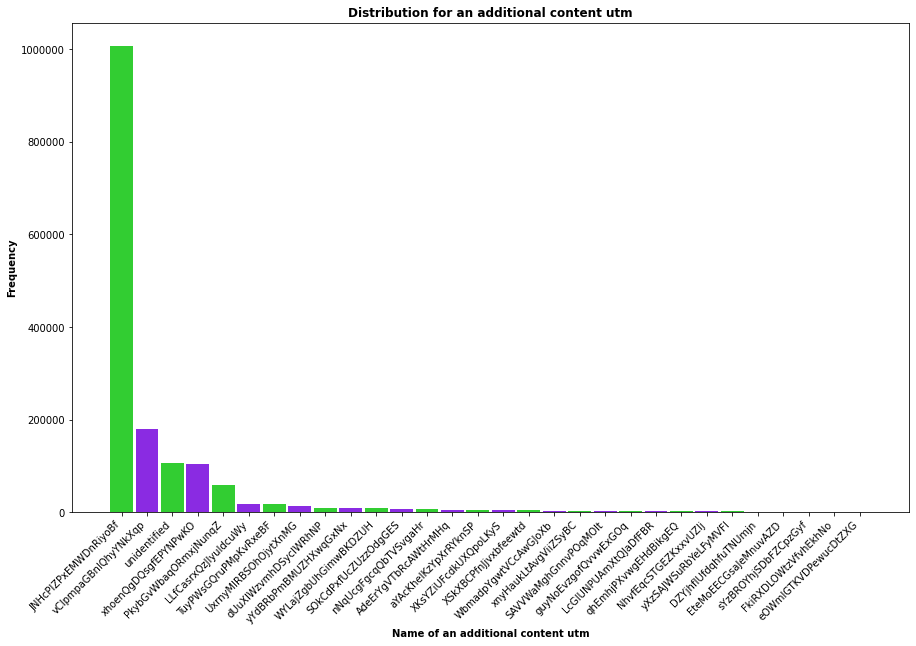

In [202]:
distribution_graph(stats_adcontent, 'utm_adcontent', 30, 'an additional content utm')

UTM with an additional information are unevenly distributed, more than 62.5% are represented by one class, 4 more values ​​are found in 11.1%, 6.6%, 6.5% and approximately 3.7% of cases. Other values ​​occur in 1% of cases or less.

### Visualization of utm with the name of the advertising campaigns distribution

In [203]:
stats_campaign = feature_stats(df, 'utm_campaign')
stats_campaign.head(7)

,utm_campaign,count
87,LTuZkdKfxRGVceoWkVyg,423139
84,LEoPHuyFvzoNfnzGgfcd,321286
39,FTjNLDyTrXaWYgZymFkV,234950
255,gecBYcKZCPMcVYdSSzKP,133247
358,unidentified,60749
192,XHNUiSKKGTEpSAlaVMFQ,26968
347,sbJRYgVfvcnqKJNDDYIr,19942


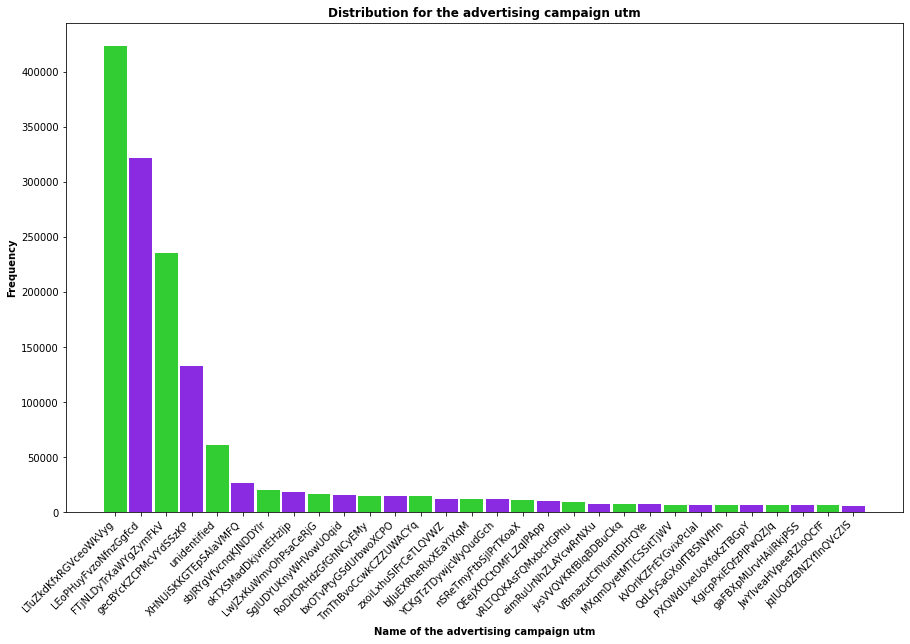

In [204]:
distribution_graph(stats_campaign, 'utm_campaign', 30, 'the advertising campaign utm')

UTM with the name of the advertising campaign is also unevenly distributed, more than 26% is represented by one class, 4 more values ​​are found in about 20%, 14.6%, 8.3% and about 3.8% of cases. Other values ​​occur in less than 2% of cases.

### Visualization of utm with acquisition channels distribution

In [205]:
stats_source = feature_stats(df, 'utm_source')
stats_source.head(7)

,utm_source,count
148,ZpYIoDJMcFzVoPFsHGJL,552555
175,fDLlAcSmythWSCVMvqvL,277060
209,kjsLglQLzykiRbcDiGcD,202790
77,MvfHsxITijuriZxsqZqt,175831
155,bByPQxmDaMXgpHeypKSM,85671
96,QxAxdyPLuQMEcrdZWdWb,45267
5,BHcvLfOaCWvWTykYqHVe,39769


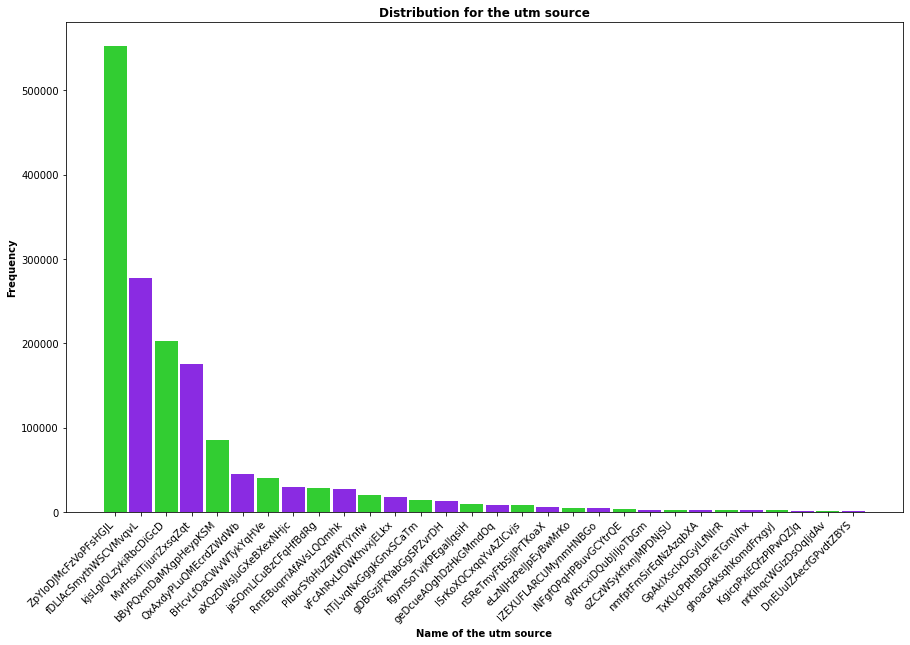

In [206]:
distribution_graph(stats_source, 'utm_source', 30, 'the utm source')

UTMs with an acquisition channel are also unevenly distributed, more than 34% are represented by one class, 4 more values ​​are found in about 17%, 12.6%, 11% and 5.3% of cases. Other values ​​occur in less than 3% of cases.

### Visualization of utm with an acquisition type distribution

In [207]:
stats_medium = feature_stats(df, 'utm_medium')
stats_medium.head(7)

,utm_medium,count
3,banner,525206
11,cpc,283165
0,(none),277060
12,cpm,229791
37,referral,132166
28,organic,55009
15,email,28287


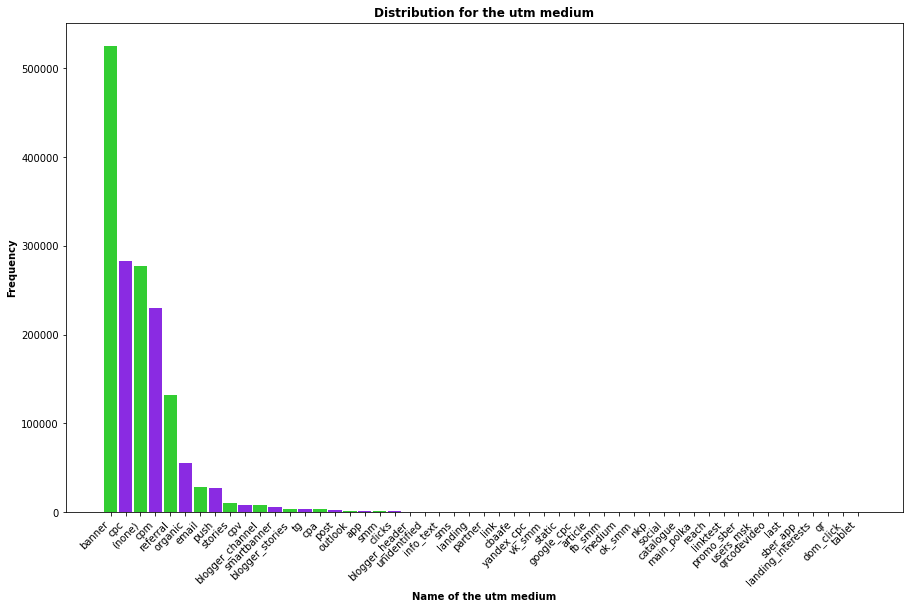

In [208]:
distribution_graph(stats_medium, 'utm_medium', 'all', 'the utm medium')

UTM with the acquisition type also unevenly distributed, more than 32.6% is represented by one class, another 7 values ​​​​are found in about 17.6%, 17.2%, 14.3%, 8.2%, 3.4% and 1.7% cases. The remaining values ​​occur in 1% or less cases.

### Visualization of utm keyword distribution

In [209]:
stats_keyword = feature_stats(df, 'utm_keyword')
stats_keyword.head(7)

,utm_keyword,count
957,puhZPIYqKXeFPaUviSjo,1060801
1058,unidentified,52903
313,NUYvxgBEIYqMlnpeDTIM,49442
747,hAmNSZmQkKQKAjZEGlgb,39987
456,UKNBOHebRIIsQRsjNKay,37854
934,pHqgLcdBQPSLcrTpLkdr,29289
221,KCcEkEaKEtUilBVMoCAi,28418


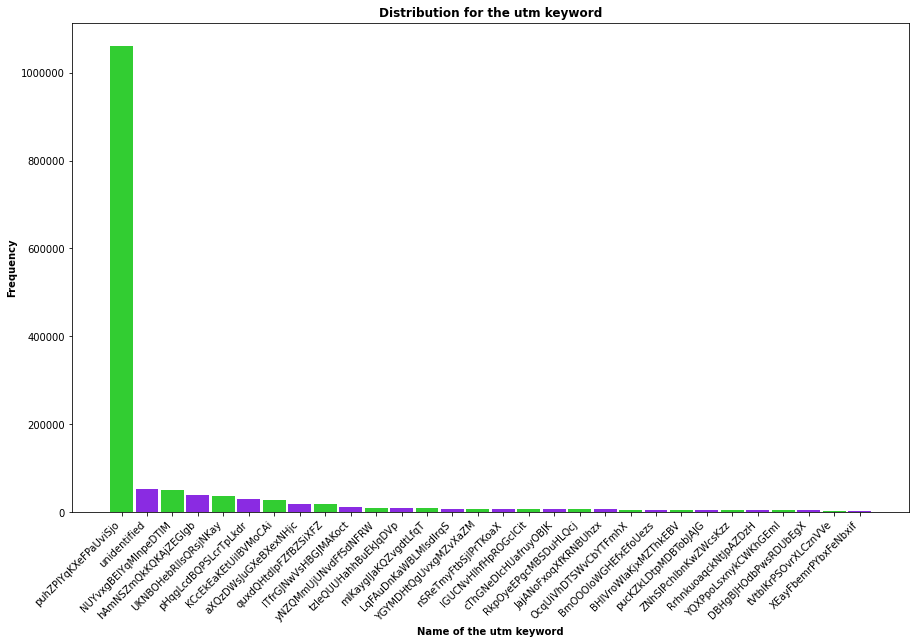

In [210]:
distribution_graph(stats_keyword, 'utm_keyword', 30, 'the utm keyword')

UTM keywords are also unevenly distributed, with about 66% represented by a single value. The remaining values ​​occur in 3% or less cases.

### Visualization of device operating system distribution

In [211]:
stats_dev_os = feature_stats(df, 'device_os')
stats_dev_os.head(7)

,device_os,count
0,Android,842404
11,iOS,459801
9,Windows,280540
5,Macintosh,23414
4,Linux,4616
12,unidentified,395
2,Chrome OS,65


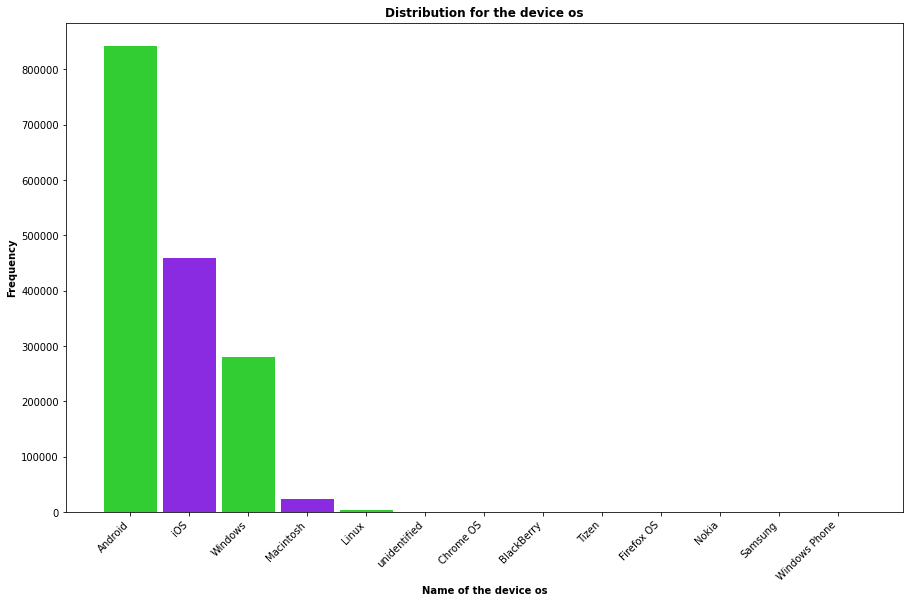

In [212]:
distribution_graph(stats_dev_os, 'device_os', 'all', 'the device os')

The operating system is represented by 5 main ones: Android, iOS, Windows, Macintoch, Linux. Others occur in less than 1% of cases.

### Visualization of device brand distribution

In [213]:
stats_dev_brand = feature_stats(df, 'device_brand')
stats_dev_brand.head(7)

,device_brand,count
9,Apple,483210
197,unidentified,301508
142,Samsung,296983
188,Xiaomi,257952
75,Huawei,165981
141,Realme,17352
125,OPPO,12284


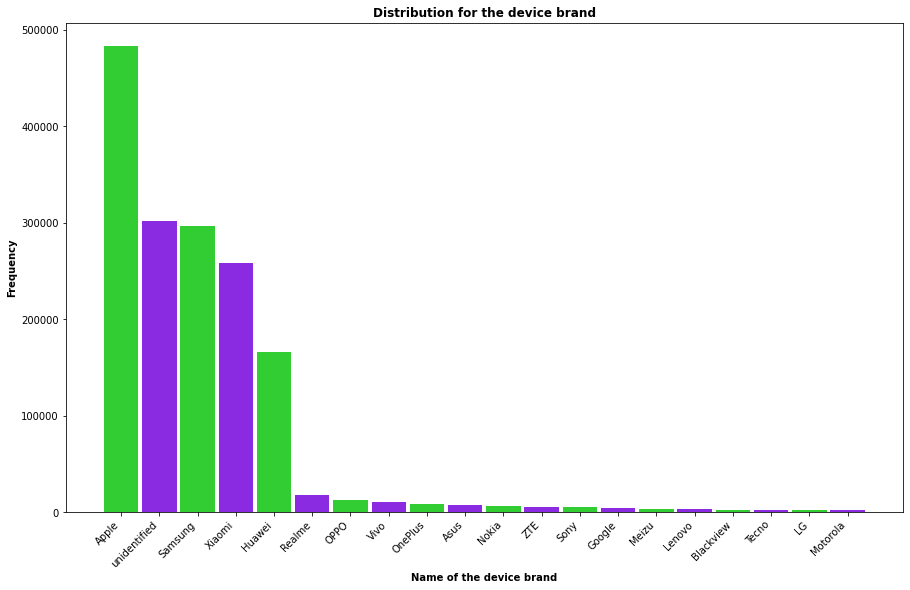

In [214]:
distribution_graph(stats_dev_brand, 'device_brand', 20, 'the device brand')

Device brands are unevenly distributed, 30% are represented by one manufacturer, 4 more are found in about 18.7%, 18.4%, 16% and 11% of cases. Other values ​​occur in less than 1% of cases.

### Visualization of device browser distribution

In [215]:
stats_browser = feature_stats(df, 'device_browser')
stats_browser.head(7)

,device_browser,count
2,chrome,900102
19,safari,462046
24,yabrowser,106432
1,android,50610
20,samsung,41735
16,opera,22502
6,firefox,13507


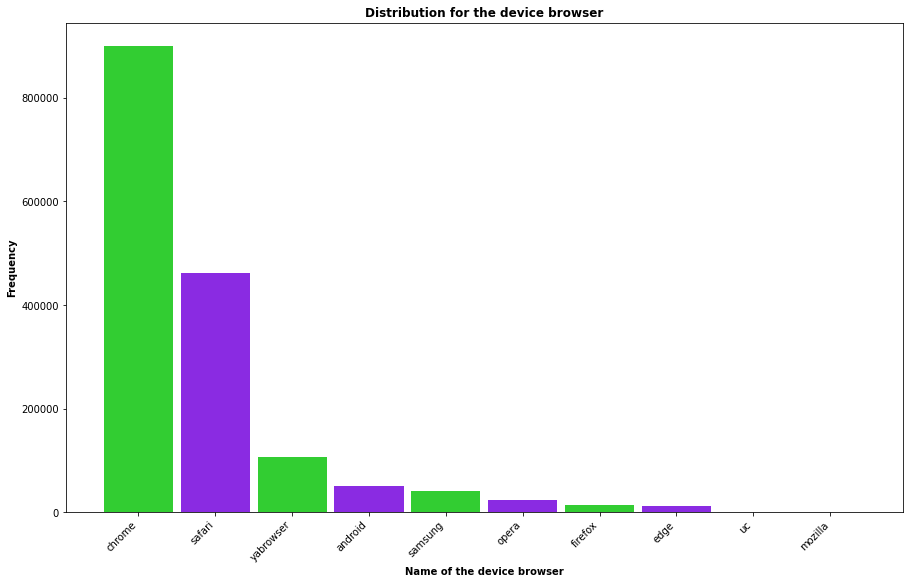

In [216]:
distribution_graph(stats_browser, 'device_browser', 10, 'the device browser')

There are 3 main browsers on the device: Chrome, Safari, Yabrowser, while others occur in less than 3% of cases.

### Visualization of device category distribution

In [217]:
stats_dev_category = feature_stats(df, 'device_category')
stats_dev_category.head()

,device_category,count
1,mobile,1287362
0,desktop,308936
2,tablet,14977


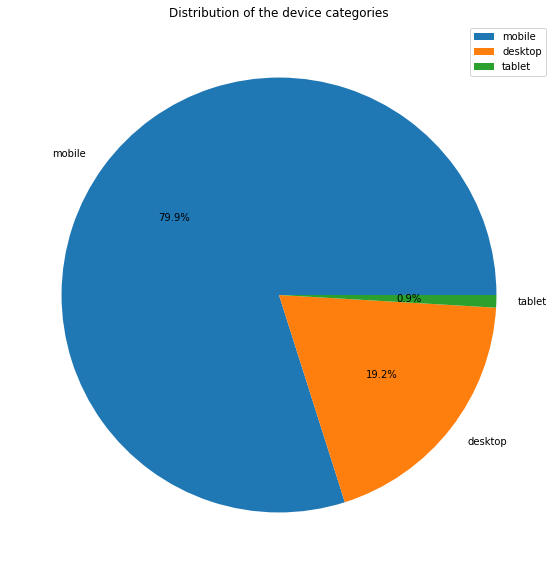

In [218]:
plt.figure(figsize=(15, 10))
plt.pie(stats_dev_category['count'], labels=stats_dev_category['device_category'], autopct = '%1.1f%%')
plt.title("Distribution of the device categories")
plt.legend()
plt.show();

### Visualization of cities distribution

In [219]:
stats_cities = feature_stats(df, 'geo_city')
stats_cities.head()

,geo_city,count
1320,Moscow,684887
1774,Saint Petersburg,252407
2338,unidentified,66083
2282,Yekaterinburg,33029
1020,Krasnodar,29709


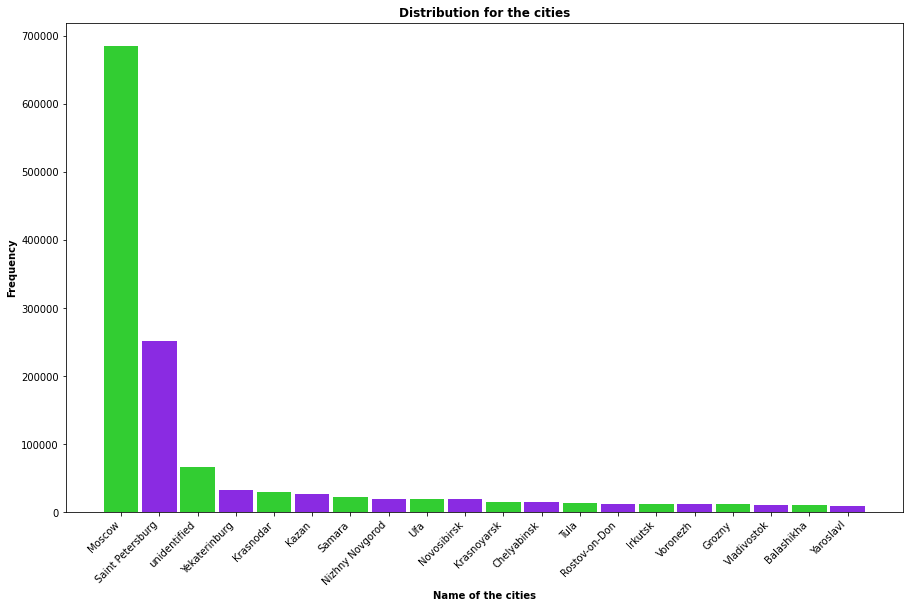

In [220]:
distribution_graph(stats_cities, 'geo_city', 20, 'the cities')

About 42,5% of clients are located in Moscow, 15.7% - in St. Petersburg, for 4.1% the city is not defined. The remaining cities are represented by 2% or less of customers.

### Visualization of the countries distribution

In [221]:
stats_country = feature_stats(df, 'geo_country')
stats_country.head()

,geo_country,count
116,Russia,1563726
147,Ukraine,8201
150,United States,8008
15,Belarus,3148
70,Kazakhstan,2029


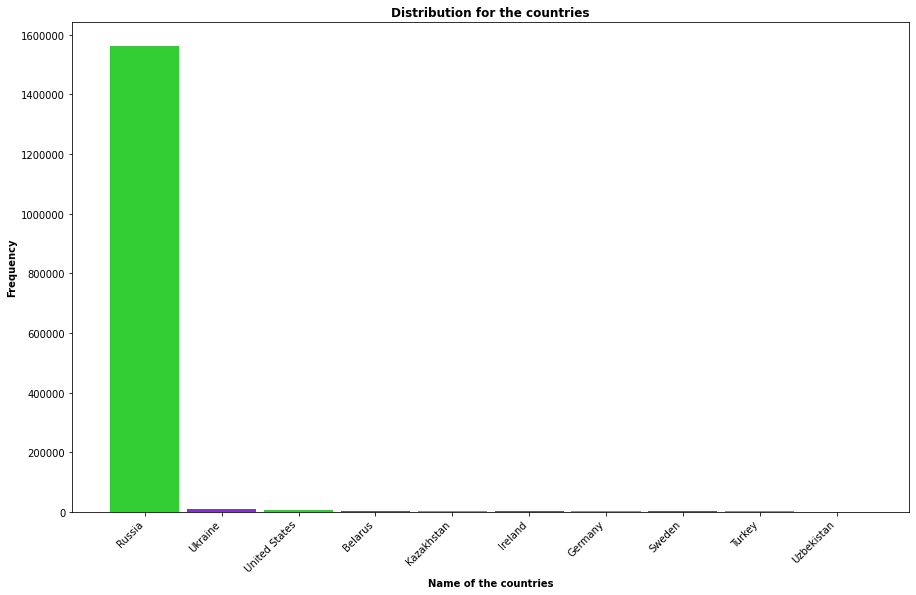

In [222]:
distribution_graph(stats_country, 'geo_country', 10, 'the countries')

97% of clients are from Russia. Other countries are represented by less than 1% of customers.

### Visualization of visits and events over time dynamics

In [223]:
# statistics on site sessions
stat_session_id = df.groupby(['visit_date'], as_index=False)[['session_id']].count()
stat_session_id = stat_session_id.rename(columns={'session_id': 'session_count'}).sort_values(by='visit_date', ascending=True)
stat_session_id.head(3)

,visit_date,session_count
0,2021-05-19,703
1,2021-05-21,815
2,2021-05-22,699


In [224]:
# statistics on the completion of the target action
stat_event_action = df.groupby(['visit_date'], as_index=False)[['event_action_ind']].sum()
stat_event_action = stat_event_action.rename(columns={'event_action_ind': 'count_success_event_action'}).sort_values(by='visit_date', ascending=True)
stat_event_action.head(3)

,visit_date,count_success_event_action
0,2021-05-19,50
1,2021-05-21,0
2,2021-05-22,10


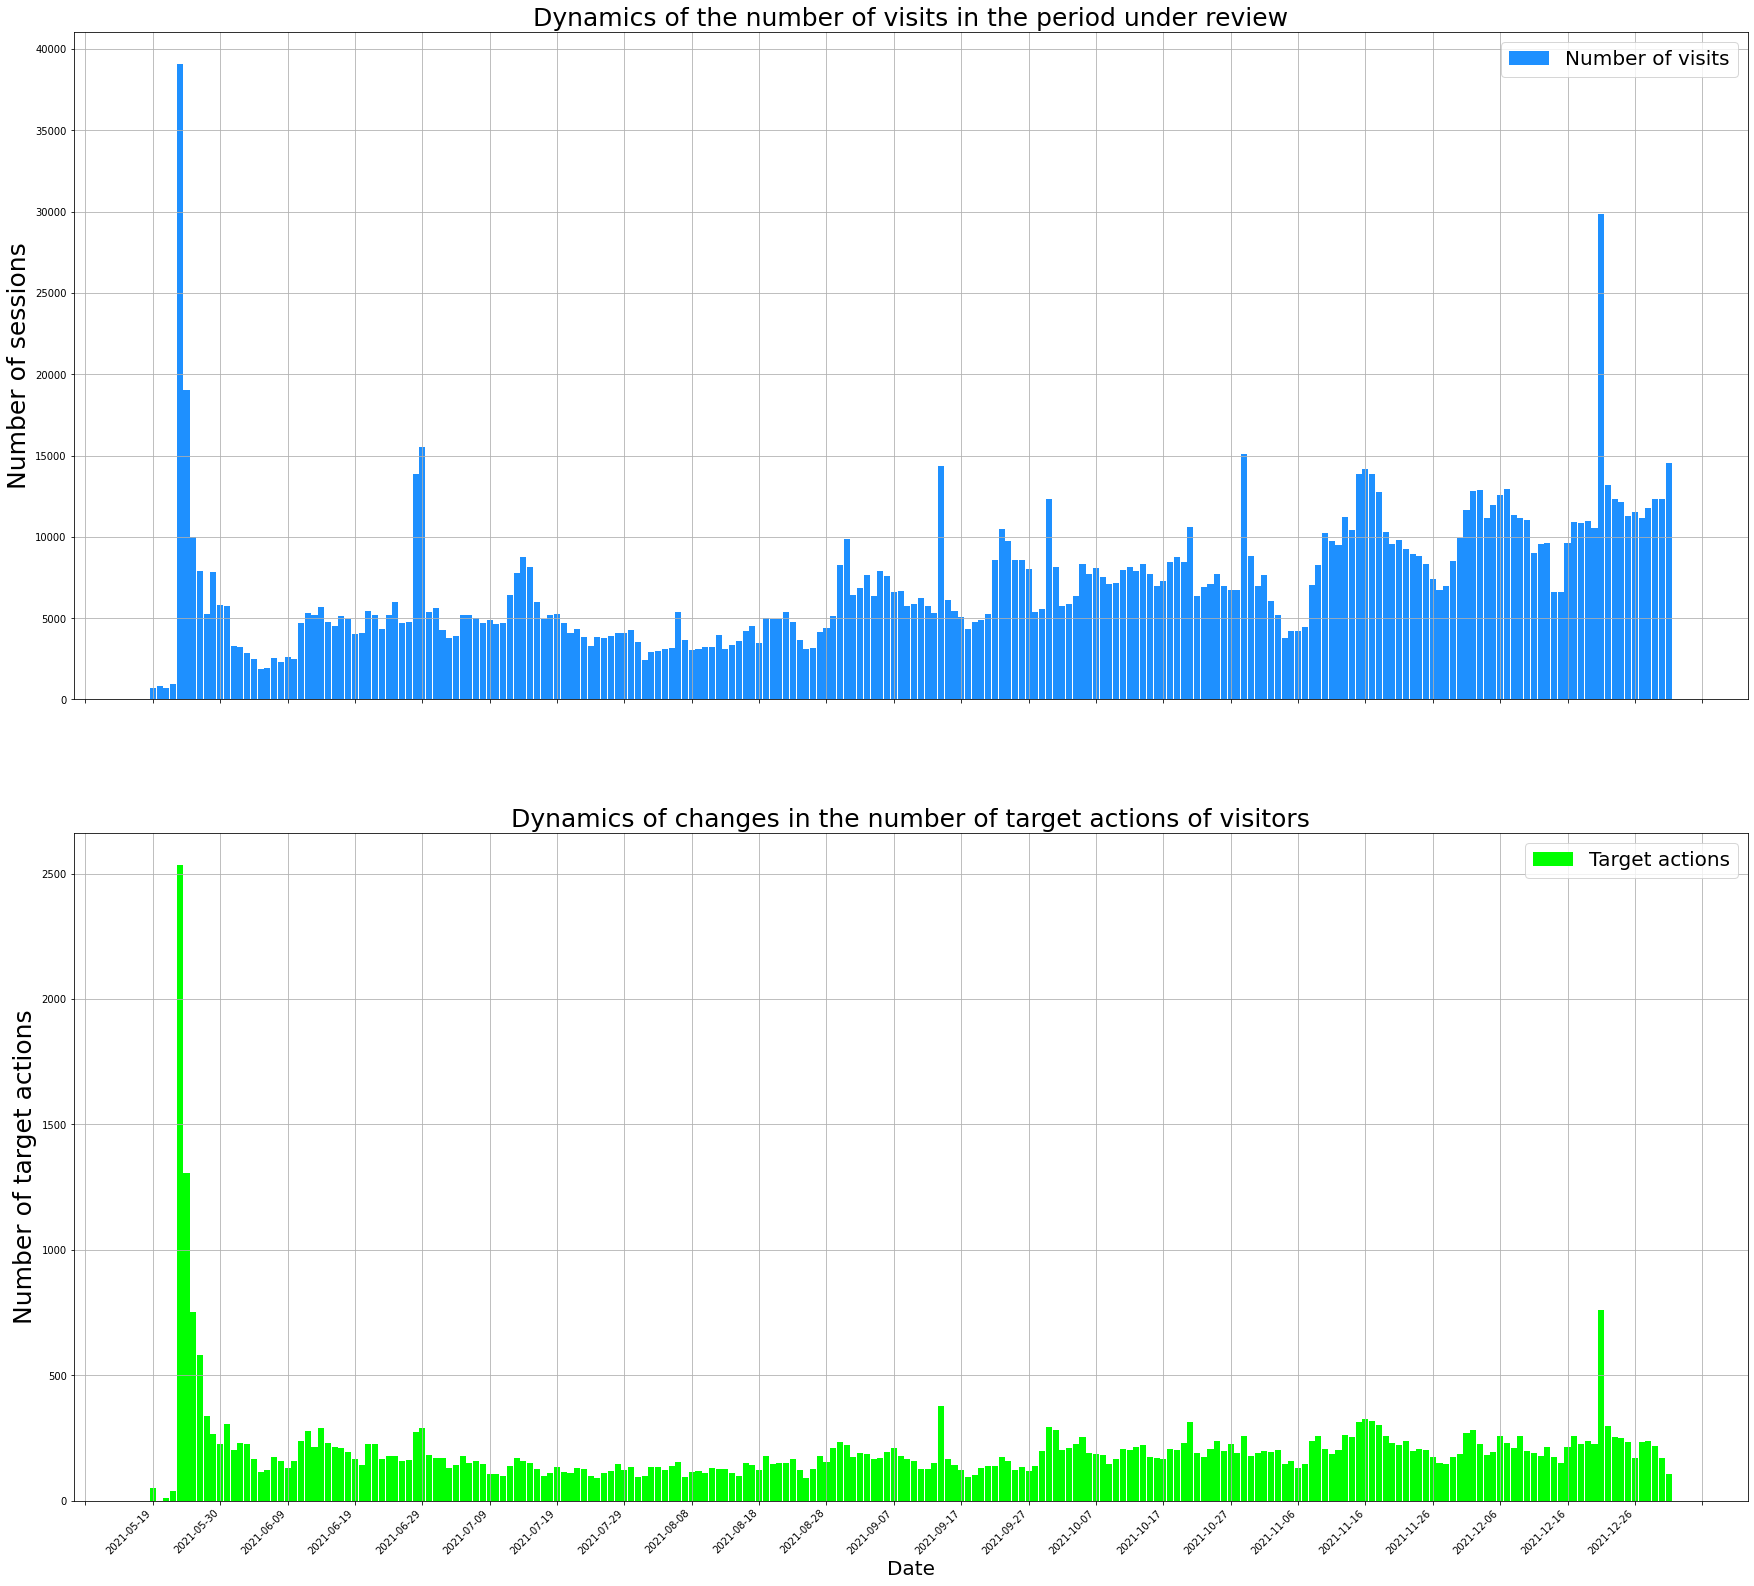

In [230]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 30))
ax[0].bar(stat_session_id['visit_date'], stat_session_id['session_count'], width=0.9, color='dodgerblue', 
                                                                            label='Number of visits')
ax[1].bar(stat_event_action['visit_date'], stat_event_action['count_success_event_action'], width=0.9, color='lime', 
                                                                            label='Target actions')

ax[0].legend(loc='upper right', fontsize=20)
ax[1].legend(loc='upper right', fontsize=20)

ax[0].set_title('Dynamics of the number of visits in the period under review', fontsize=25)
ax[1].set_title('Dynamics of changes in the number of target actions of visitors', fontsize=25)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date', fontsize=20)

ax[0].set_ylabel('Number of sessions', fontsize=25)
ax[1].set_ylabel('Number of target actions', fontsize=25)

ax[0].tick_params(axis='both')
ax[1].tick_params(axis='both')

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(10))    
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(10)) 


ax[0].grid()
ax[1].grid()


fig.autofmt_xdate(rotation=45);

The graphs demonstrate that in dynamics the number of visits grows over time, while the number of targeted actions is approximately the same (with the exception of the summer months and certain dates and weeks, which may be due to the success of the advertising campaign in the specified period).

In [226]:
# Removing non-informative columns and saving the dataset to a csv file

df_final = df.drop(columns=['session_id', 'client_id'])
df_final.to_csv('data/sberavto_data_prepared.csv', index=False)

### Heatmap for correlations demonstration

Target encoding is going to be used as it is the method of converting a categorical value into the mean of the target variable. This type of encoding is a type of bayesian encoding method where bayesian encoders use target variables to encode the categorical value.

In [238]:
data = ['utm_source', 'utm_campaign', 'utm_medium', 'utm_keyword', 'utm_adcontent', 'device_browser', 'device_os', 'device_brand', 'device_category', 'geo_country', 'geo_city']
encoder = TargetEncoder()
for elem in data:
     df[elem + '_encoded'] = encoder.fit_transform(df[elem], df['event_action_ind'])

In [239]:
columns_for_drop = ['session_id', 'client_id', 'utm_source', 'utm_keyword', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_browser', 'device_os', 'device_category', 'geo_city', 'device_brand', 'geo_country', 'device_screen_resolution', 'visit_date', 'visit_time']
df_prepared = df.drop(columns=columns_for_drop)
df_prepared.head()

,visit_number,event_action_ind,utm_source_encoding,utm_campaign_encoding,utm_medium_encoding,utm_keyword_encoding,utm_adcontent_encoding,device_browser_encoding,device_os_encoding,device_brand_encoding,device_category_encoding,geo_country_encoding,geo_city_encoding
0,1,0,0.028953,0.029096,0.028764,0.033510,0.021796,0.028008,0.027200,0.025756,0.027504,0.028546,0.014151
1,1,0,0.012791,0.010415,0.010962,0.015396,0.012186,0.027555,0.027200,0.031692,0.027504,0.028546,0.030434
2,1,0,0.028953,0.029096,0.028764,0.033510,0.021796,0.028008,0.027200,0.025756,0.027504,0.028546,0.024566
3,1,0,0.023142,0.021807,0.019335,0.012324,0.012517,0.028008,0.027200,0.024136,0.027504,0.028546,0.030434
5,1,0,0.023142,0.044936,0.038176,0.053680,0.034894,0.028110,0.027956,0.028193,0.027504,0.028546,0.024690


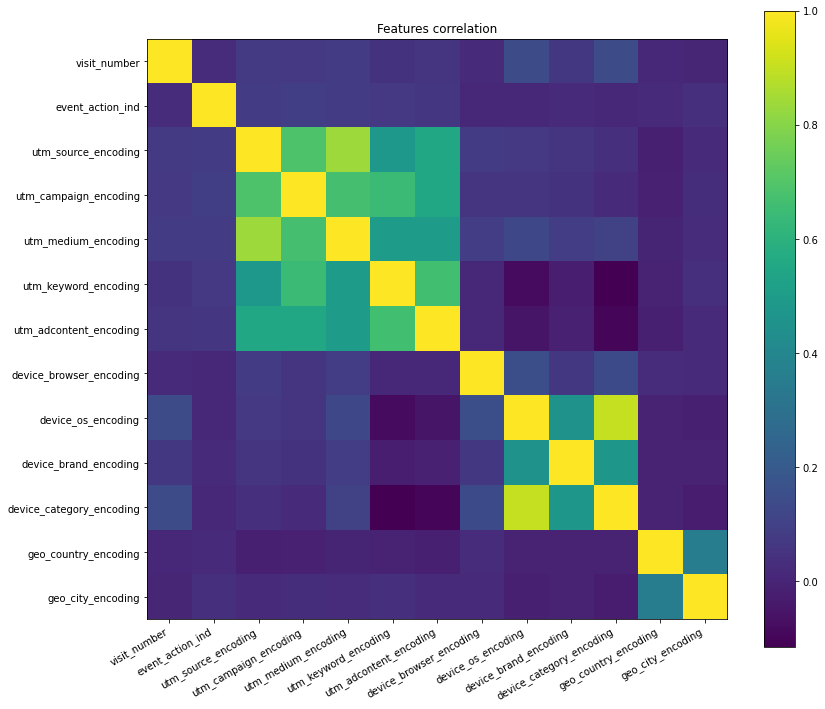

In [243]:
columns = df_prepared.corr().columns.tolist()

fig, ax = plt.subplots(figsize=(13, 13))
heatmap = ax.imshow(df_prepared.corr())
ax.set_xticks(range(0, len(columns)), columns)
ax.set_yticks(range(0, len(columns)), columns)
ax.set_title("Features correlation")
fig.colorbar(heatmap)
fig.autofmt_xdate(rotation=30);

The heat map demonstrates a strong correlation of UTM tag features, as well as features that characterize the device and geographic location. This indicates the involvement of certain advertising resources and channels within the framework of individual advertising campaigns, as a result, the correlation of features with additional information, probably clarification of a specific link or location of advertising on a resource and a keyword with other tags. The correlation between the device category and the operating system is explained by the fact that each brand corresponds to its operating system. Similarly, city-country features pair does.